In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

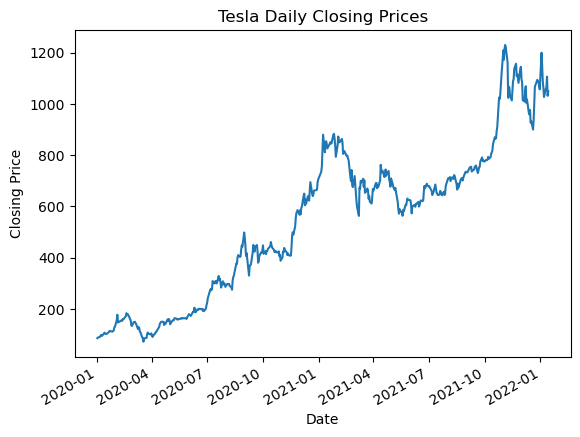

In [6]:
# Load data
data = pd.read_csv('data/tsla.csv', index_col='Date', parse_dates=True)

# Plot the closing prices
data['Close'].plot(title='Tesla Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

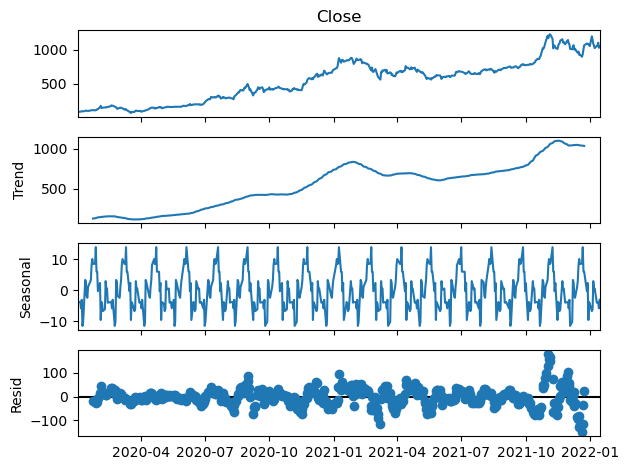

In [7]:


# Decomposing the time series
decomposition = seasonal_decompose(data['Close'], model='additive', period=30)

# Plotting the decomposed time series components
decomposed_components = decomposition.plot()
plt.show()


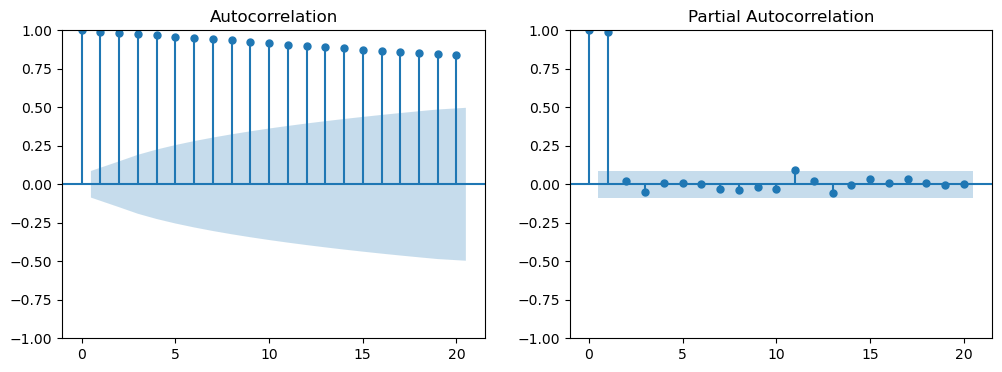

In [8]:


# Augmented Dickey-Fuller test for stationarity
adf_test = adfuller(data['Close'])

# ACF and PACF plots
lags = 20  # Number of lags for ACF and PACF plots

# Display ADF test results
adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Critical Values': adf_test[4]
}

adf_result

# Plotting ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(data['Close'], lags=lags, ax=ax1)
plot_pacf(data['Close'], lags=lags, ax=ax2)
plt.show()


In [9]:


# Tentative ARIMA parameters
p, d, q = 2, 1, 2  # These are example values and should be refined

# Fit ARIMA model
model = ARIMA(data['Close'], order=(p, d, q))
model_fit = model.fit()

# Model Summary
model_summary = model_fit.summary()
model_summary


/Users/ngratzi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ngratzi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ngratzi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  515
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2362.153
Date:                Wed, 15 Nov 2023   AIC                           4734.306
Time:                        22:18:25   BIC                           4755.517
Sample:                             0   HQIC                          4742.619
                                - 515                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7660      0.013   -134.145      0.000      -1.792      -1.740
ar.L2         -0.9947      0.012    -80.419      0.000      -1.019      -0.970
ma.L1          1.7735      0.019     90.961      0.000       1.735       1.812
ma.L2          0.9929      0.022     45.526      0.000       0.950       1.036
sigma2       571.6107     21.943     26.049      0.000     528.603     614.619
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               658.39
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               5.95   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/ngratzi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ngratzi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ngratzi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ngratzi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at 

RMSE: 310.42668579390585


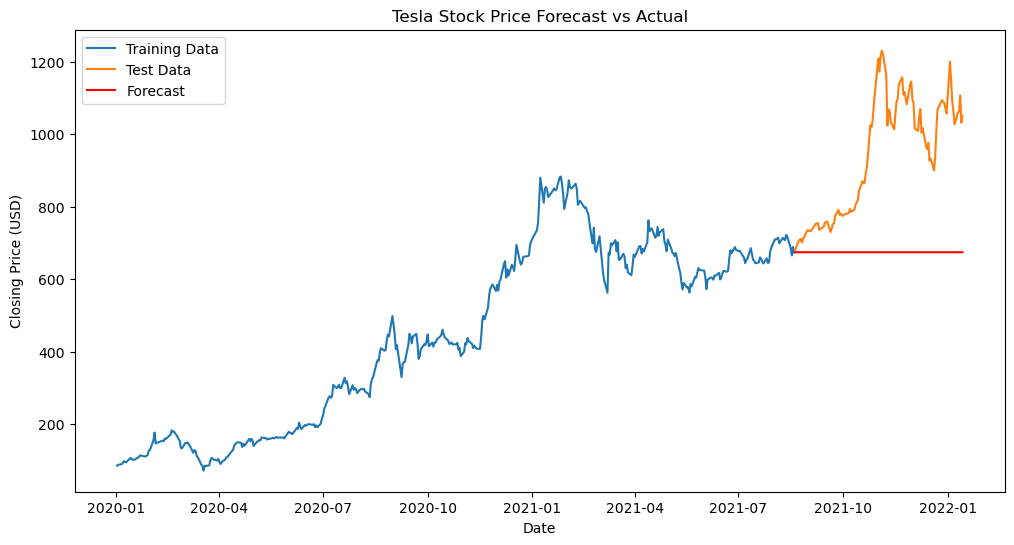

In [18]:


# Splitting the data into training and test sets
train_size = int(len(data) * 0.8)
train = data['Close'][:train_size]
test = data['Close'][train_size:]

# Fitting an ARIMA model
# Using a simple ARIMA(1,1,1) model as a starting point - these parameters should be fine-tuned
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Model Evaluation
rmse = sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Tesla Stock Price Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


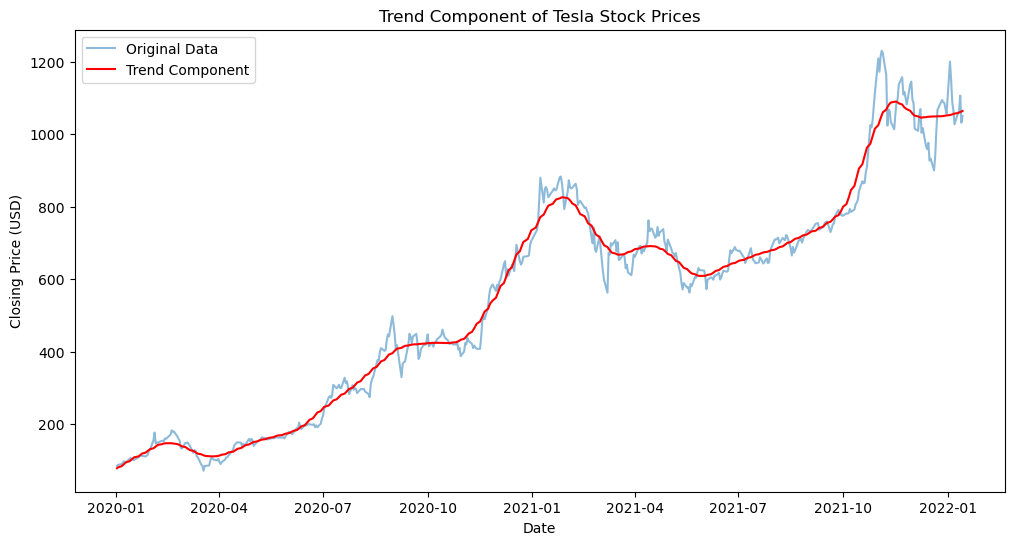

In [19]:


# Reapplying STL Decomposition
stl = STL(data['Close'], seasonal=13, period=30)  # Assuming a monthly period for decomposition
stl_result = stl.fit()

# Extracting the trend component
trend_component = stl_result.trend

# Plotting the trend component
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Original Data', alpha=0.5)
plt.plot(trend_component, label='Trend Component', color='red')
plt.title('Trend Component of Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()




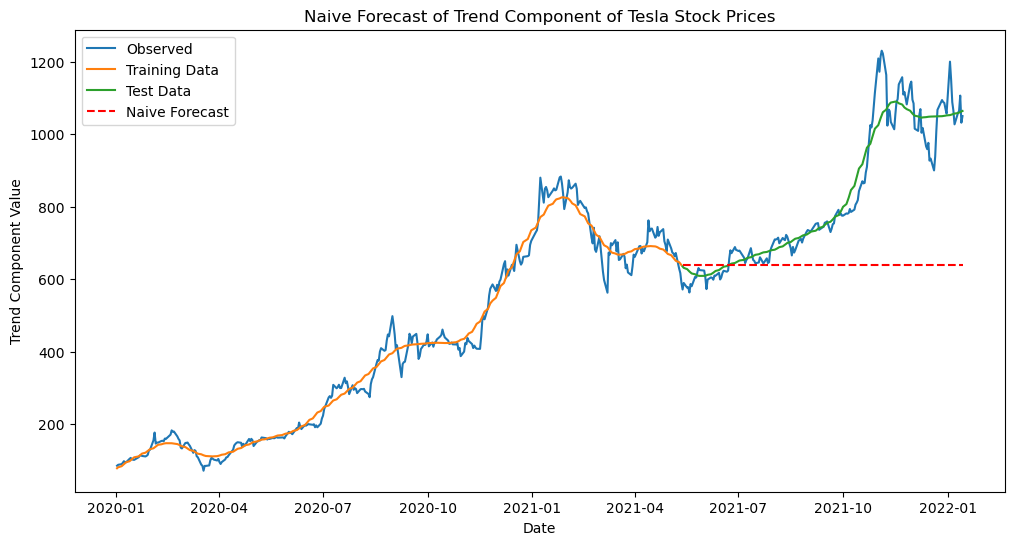

In [21]:
# Splitting the trend data into training and test sets
train_size = int(len(trend_component) * 2 / 3)
train_trend = trend_component[:train_size]
test_trend = trend_component[train_size:]

# Naive Forecasting: We assume the last value of the training set continues into the future
naive_forecast = pd.Series([train_trend.iloc[-1]] * len(test_trend), index=test_trend.index)

# Plotting the trend component with the naive forecast
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label="Observed")
plt.plot(train_trend, label='Training Data')
plt.plot(test_trend, label='Test Data')
plt.plot(naive_forecast, label='Naive Forecast', linestyle='--', color='red')
plt.title('Naive Forecast of Trend Component of Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Trend Component Value')
plt.legend()
plt.show()


/Users/ngratzi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ngratzi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ngratzi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/Users/ngratzi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ngratzi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


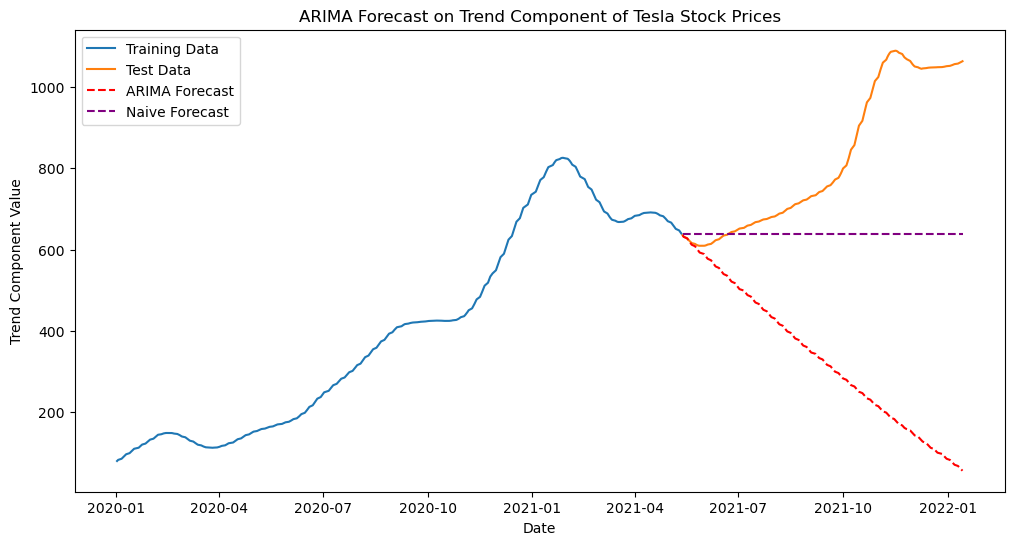

In [23]:
# Fitting an ARIMA model to the trend component of the training data
# Using a simple ARIMA(1,1,1) model as a starting point
arima_model = ARIMA(train_trend, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Forecasting the same length as the test set
arima_forecast = arima_model_fit.forecast(steps=len(test_trend))

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(train_trend, label='Training Data')
plt.plot(test_trend, label='Test Data')
plt.plot(test_trend.index, arima_forecast, label='ARIMA Forecast', linestyle='--', color='red')
plt.plot(naive_forecast, label='Naive Forecast', linestyle='--', color='purple')
plt.title('ARIMA Forecast on Trend Component of Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Trend Component Value')
plt.legend()
plt.show()
